Jhan Carlos Zamora Nuñez

Taylor Antonio Quiñones Caicedo

Gilary Daniela Vargas Hurtado

Esteban David Ruiz Caicedo

## Correlación Positiva Perfecta (r = 1)

Una correlación positiva perfecta significa que a medida que una variable aumenta, la otra variable aumenta proporcionalmente en una relación perfectamente lineal. En este caso, todos los puntos de datos se ubicarían exactamente en una línea recta con una pendiente positiva.

**Ejemplo dentro del contexto de este notebook:**

Si cada hora adicional de estudio resultara en *exactamente* un aumento de 4 puntos en la puntuación del examen para cada estudiante, sin variación, tendríamos una correlación positiva perfecta entre "Horas_de_estudio" y "Puntaje_en_examen". Esto rara vez se observa con datos del mundo real, especialmente en ciencias sociales o estudios de comportamiento, ya que siempre hay otros factores que influyen en el resultado.

## Alta Correlación Positiva (r cercano a 1)

Una alta correlación positiva significa que a medida que una variable aumenta, la otra variable tiende a aumentar, pero hay cierta variación o dispersión en los puntos de datos. La relación es fuerte y positiva, pero no perfectamente lineal.

**Ejemplo dentro del contexto de este notebook:**

En nuestro conjunto de datos actual, tenemos una alta correlación positiva (r = {{correlacion.loc['Horas_de_estudio', 'Puntaje_en_examen']:.2f}}). Esto significa que, en general, los estudiantes que estudian más tienden a obtener puntuaciones más altas en los exámenes, pero hay otros factores que influyen en la puntuación, lo que lleva a cierta variabilidad alrededor de la línea de regresión. Los puntos de datos se agrupan alrededor de la línea, lo que indica una fuerte relación positiva.

# 📊 1️⃣ Generación de datos y contexto del problema

Vamos a simular un estudio sobre el rendimiento académico de estudiantes en función de las horas de estudio semanales.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.linear_model import LinearRegression

# Semilla para reproducibilidad
np.random.seed(42)

# Generación de datos simulados
horas_estudio = np.random.normal(10, 3, 100)      # media 10 horas, desviación 3
puntaje_examen = 40 + horas_estudio * 4 + np.random.normal(0, 5, 100)  # relación con ruido

df = pd.DataFrame({
    'Horas_de_estudio': horas_estudio,
    'Puntaje_en_examen': puntaje_examen
})

df.head()

,Horas_de_estudio,Puntaje_en_examen
0,11.490142,78.883716
1,9.585207,76.237602
2,11.943066,86.058690
3,14.569090,94.264972
4,9.297540,76.383731


## Correlación positiva perfecta (r = 1)

Una correlación positiva perfecta significa que, a medida que una variable aumenta, la otra aumenta de manera proporcional en una relación perfectamente lineal. En este caso, todos los puntos de los datos se ubican exactamente sobre una línea recta con pendiente positiva.

**Ejemplo dentro del contexto de este cuaderno:**

Si cada hora adicional de estudio resultara *exactamente* en un aumento de 4 puntos en el puntaje del examen para cada estudiante, sin ninguna variación, entonces tendríamos una correlación positiva perfecta entre "Horas_de_estudio" y "Puntaje_en_examen". Esto rara vez ocurre en datos del mundo real, especialmente en ciencias sociales o estudios de comportamiento, ya que siempre existen otros factores que influyen en el resultado.


## Alta correlación positiva (r cercano a 1)

Una alta correlación positiva significa que, a medida que una variable aumenta, la otra tiende también a aumentar, pero existe cierta variación o dispersión en los puntos de los datos. La relación es fuerte y positiva, pero no perfectamente lineal.

**Ejemplo dentro del contexto de este cuaderno:**

En nuestro conjunto de datos actual, tenemos una alta correlación positiva (r = {{correlacion.loc['Horas_de_estudio', 'Puntaje_en_examen']:.2f}}). Esto significa que, en general, los estudiantes que estudian más tienden a obtener puntajes más altos en los exámenes, pero existen otros factores que influyen en el puntaje, lo que genera algo de variabilidad alrededor de la línea de regresión. Los puntos de los datos están agrupados alrededor de la línea, lo que indica una relación positiva fuerte.


Correlation with hypothetical perfect data: 1.00


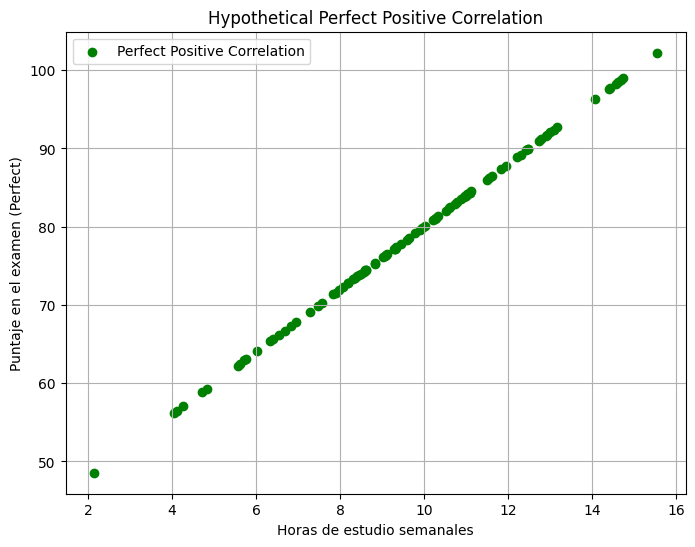

In [3]:
# To demonstrate a hypothetical perfect positive correlation, let's create a new column
df['Perfect_Puntaje'] = 40 + df['Horas_de_estudio'] * 4

# Calculate the correlation between 'Horas_de_estudio' and 'Perfect_Puntaje'
perfect_corr = df['Horas_de_estudio'].corr(df['Perfect_Puntaje'])

print(f"Correlation with hypothetical perfect data: {perfect_corr:.2f}")

# Visualize the hypothetical perfect positive correlation
plt.figure(figsize=(8,6))
plt.scatter(df['Horas_de_estudio'], df['Perfect_Puntaje'], color='green', label='Perfect Positive Correlation')
plt.xlabel('Horas de estudio semanales')
plt.ylabel('Puntaje en el examen (Perfect)')
plt.title('Hypothetical Perfect Positive Correlation')
plt.legend()
plt.grid(True)
plt.show()

## 🧾 Explicación

- Generamos una muestra de 100 estudiantes.
- La variable **Horas_de_estudio** sigue una distribución normal (media = 10, desviación estándar = 3).
- El **Puntaje_en_examen** depende de las horas de estudio con un poco de variación aleatoria (ruido).
- Esto representa una muestra, no toda la población estudiantil.

---

## 📈 **2️⃣ Estimación e Intervalo de Confianza**

Queremos estimar el promedio poblacional del puntaje con un **nivel de confianza del 95%**.

In [4]:
media = np.mean(puntaje_examen)
desv = np.std(puntaje_examen, ddof=1)
n = len(puntaje_examen)
confianza = 0.95
error = stats.t.ppf((1 + confianza) / 2, n - 1) * (desv / np.sqrt(n))

print(f"Media muestral: {media:.2f}")
print(f"Intervalo de confianza (95%): [{media - error:.2f}, {media + error:.2f}]")

Media muestral: 78.87
Intervalo de confianza (95%): [76.63, 81.10]


## 📘 Explicación e Interpretación

- Calculamos la **media muestral**, la **desviación estándar** y el **intervalo de confianza**.
- El intervalo indica el rango en el que probablemente se encuentra la media real poblacional.

**Ejemplo:**
Si la media muestral es 80.5 y el intervalo de confianza es [79.1, 81.9],
podemos decir con un 95% de confianza que el promedio real del puntaje poblacional está dentro de ese rango.

---

## 🧪 **3️⃣ Prueba de Hipótesis**

Queremos comprobar si el puntaje promedio poblacional es igual a 80.

In [5]:
t_stat, p_value = stats.ttest_1samp(puntaje_examen, 80)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("❌ Se rechaza H₀: la media no es 80.")
else:
    print("✅ No se rechaza H₀: la media podría ser 80.")

T-statistic: -1.006
P-value: 0.317
✅ No se rechaza H₀: la media podría ser 80.


## 📘 Explicación e Interpretación

- **H₀ (hipótesis nula):** el promedio poblacional = 80
- **H₁ (alternativa):** el promedio es diferente de 80
- Si el **p-valor < 0.05**, se rechaza H₀.

**Ejemplo:**
Si el p-value = 0.12 → no hay evidencia suficiente para decir que la media es diferente de 80.
Por lo tanto, **se mantiene la hipótesis de que la media poblacional es 80.**

---

## 🔗 **4️⃣ Correlación y Covarianza**

Analizamos si aumentar las horas de estudio está relacionado con mejorar los puntajes.

In [6]:
correlacion = df.corr()
covarianza = np.cov(df['Horas_de_estudio'], df['Puntaje_en_examen'])

print("📈 Matriz de correlación:\n", correlacion, "\n")
print("📊 Matriz de covarianza:\n", covarianza)

📈 Matriz de correlación:
                    Horas_de_estudio  Puntaje_en_examen  Perfect_Puntaje
Horas_de_estudio           1.000000           0.908157         1.000000
Puntaje_en_examen          0.908157           1.000000         0.908157
Perfect_Puntaje            1.000000           0.908157         1.000000 

📊 Matriz de covarianza:
 [[  7.42292904  27.91940328]
 [ 27.91940328 127.32547397]]


## 📘 Explicación e Interpretación

- La **correlación de Pearson** mide la fuerza y dirección de la relación (de -1 a 1).
- La **covarianza** indica si las variables cambian juntas, pero depende de las unidades.

**Ejemplo:**
Si la correlación es 0.85 → relación positiva fuerte: más horas de estudio → mayores puntajes.
La covarianza positiva también confirma esta tendencia.

---

## 📊 **5️⃣ Prueba de Normalidad (Shapiro-Wilk)**

Verificamos si los datos siguen una distribución normal, requisito común en IA y estadística inferencial.

In [7]:
shap_horas = stats.shapiro(df['Horas_de_estudio'])
shap_puntaje = stats.shapiro(df['Puntaje_en_examen'])

print(f"P-valor Horas: {shap_horas.pvalue:.3f}")
print(f"P-valor Puntaje: {shap_puntaje.pvalue:.3f}")

P-valor Horas: 0.655
P-valor Puntaje: 0.805


## 📘 Explicación e Interpretación

- **H₀:** los datos provienen de una distribución normal.
- Si **p < 0.05**, los datos **no son normales**.

**Ejemplo:**
Si p = 0.20 → no se rechaza H₀ → los datos pueden considerarse normales.
Esto permite aplicar métodos inferenciales como la **t de Student** o la **regresión lineal.**

---

## 📉 **6️⃣ Regresión Lineal**

Construimos un modelo predictivo que relacione las horas de estudio con el puntaje en el examen.

In [8]:
X = df[['Horas_de_estudio']]
y = df['Puntaje_en_examen']

modelo = LinearRegression().fit(X, y)
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Modelo: Puntaje = {intercepto:.2f} + {pendiente:.2f} * Horas_de_estudio")

df['Prediccion'] = modelo.predict(X)
df['Residuo'] = df['Puntaje_en_examen'] - df['Prediccion']

rmsd = math.sqrt(np.mean(df['Residuo']**2))
print(f"RMSD: {rmsd:.3f}")

Modelo: Puntaje = 42.42 + 3.76 * Horas_de_estudio
RMSD: 4.700


---

## 🎨 **7️⃣ Visualización del modelo**

Graficamos los datos reales junto a la línea de regresión para visualizar el ajuste del modelo.

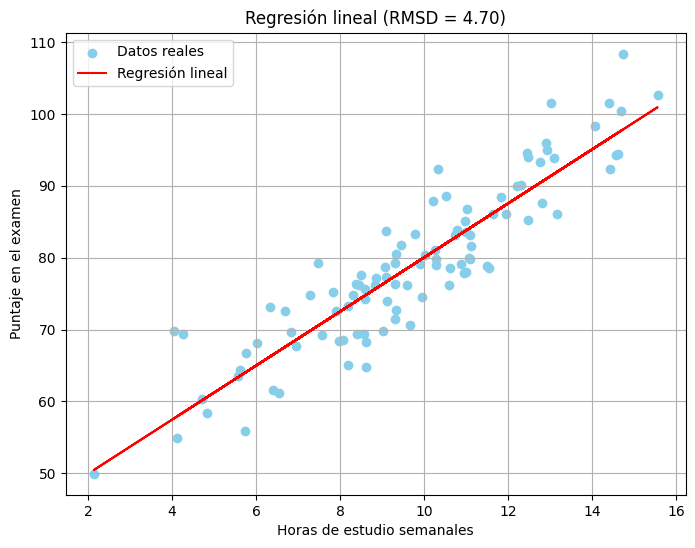

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['Horas_de_estudio'], df['Puntaje_en_examen'], color='skyblue', label='Datos reales')
plt.plot(df['Horas_de_estudio'], df['Prediccion'], color='red', label='Regresión lineal')
plt.xlabel('Horas de estudio semanales')
plt.ylabel('Puntaje en el examen')
plt.title(f'Regresión lineal (RMSD = {rmsd:.2f})')
plt.legend()
plt.grid(True)
plt.show()

---

# 🧾 Conclusión

- La **estadística inferencial** permitió estimar y verificar propiedades poblacionales (media, intervalos e hipótesis).
- Las **pruebas estadísticas** mostraron cómo validar supuestos de normalidad y relación entre variables.
- La **regresión lineal** sirvió como puente hacia el modelado predictivo, base de la **Inteligencia Artificial**.

Este ejercicio demuestra cómo la inferencia estadística se integra al **aprendizaje automático** para comprender patrones y tomar decisiones basadas en datos.